In [ ]:
#Lending Club Dataset 2015

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os
os.getcwd()

'/Users/Ashutosh.Purohit/Lending Club Data Analysis'

In [5]:
ldat = pd.read_csv('LoanStats3d.csv')

/Users/Ashutosh.Purohit/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
ldat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205531 entries, 0 to 205530
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(85), object(26)
memory usage: 174.1+ MB


In [27]:
ldat.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0


In [26]:
type(ldat['int_rate'][0])

numpy.float64

In [25]:
# change int_rate to float
ldat.int_rate = pd.Series(ldat.int_rate).str.replace('%', '').astype(float)

In [33]:
# Loan status
ldat['loan_status'].value_counts()

Current               127345
Fully Paid             51943
Charged Off            18384
Late (31-120 days)      4429
In Grace Period         2196
Late (16-30 days)        868
Default                  363
Name: loan_status, dtype: int64

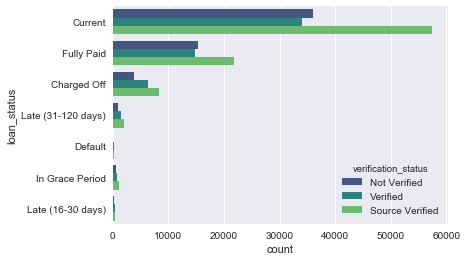

In [47]:
sns.countplot(y = ldat['loan_status'] ,data = ldat, palette='viridis', hue = ldat['verification_status'] )

In [41]:
#Employee Title - Top 5
ldat['emp_title'].value_counts().head(5)

Teacher             4079
Manager             3420
Owner               1985
RN                  1608
Registered Nurse    1571
Name: emp_title, dtype: int64

In [50]:
#Loan Requested vs Funding given
(ldat['loan_amnt'] == ldat['funded_amnt']).value_counts()

True     205528
False         3
dtype: int64

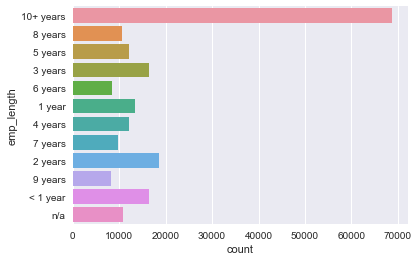

In [55]:
# member work experience
sns.countplot(data = ldat, y ='emp_length')

In [56]:
#loan purpose
ldat['purpose'].value_counts()

debt_consolidation    126086
credit_card            47367
home_improvement       11675
other                   8888
major_purchase          3377
medical                 1707
car                     1640
small_business          1595
moving                  1222
vacation                1133
house                    729
renewable_energy         105
wedding                    3
educational                1
Name: purpose, dtype: int64

In [60]:
ldat['delinq_amnt'].value_counts().head(5)

0.0     204686
75.0        15
30.0        11
54.0        11
53.0        10
Name: delinq_amnt, dtype: int64

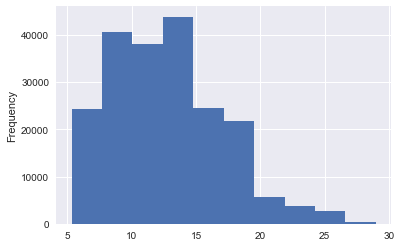

In [62]:
ldat['int_rate'].plot( kind = 'hist', )

In [76]:
ldat[ldat['addr_state'] == ('CA' or 'TX' or 'NY') ].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
18,66624733,71350547.0,18000.0,18000.0,18000.0,60 months,19.48,471.70,E,E2,...,0.0,3.0,100.0,14.3,1.0,0.0,65819.0,36247.0,10300.0,31319.0
27,55254406,58835335.0,18000.0,18000.0,18000.0,60 months,9.99,382.36,B,B3,...,0.0,0.0,100.0,0.0,0.0,0.0,61300.0,15073.0,48600.0,7000.0
41,55241185,58821979.0,30000.0,30000.0,30000.0,36 months,19.19,1102.57,E,E3,...,0.0,4.0,82.0,22.2,0.0,0.0,781204.0,102553.0,35400.0,96854.0
42,55141229,58712046.0,4800.0,4800.0,4800.0,36 months,13.33,162.50,C,C3,...,0.0,3.0,100.0,25.0,0.0,0.0,48845.0,31203.0,11100.0,27945.0
47,55111236,58682040.0,10000.0,10000.0,10000.0,36 months,11.53,329.91,B,B5,...,0.0,3.0,100.0,14.3,0.0,0.0,65454.0,30923.0,19800.0,32054.0


In [91]:
# top 5 states by volume
ldat['addr_state'].value_counts().head(5)

CA    28616
TX    16613
NY    16371
FL    14302
IL     8177
Name: addr_state, dtype: int64

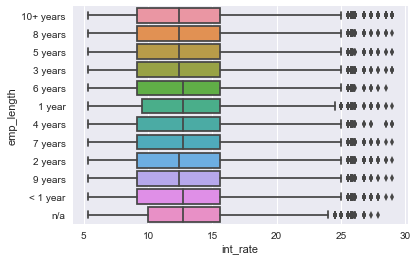

In [102]:
# Boxplot employee work experience vs int_rate
sns.boxplot(data = ldat, x = 'int_rate', y = 'emp_length')

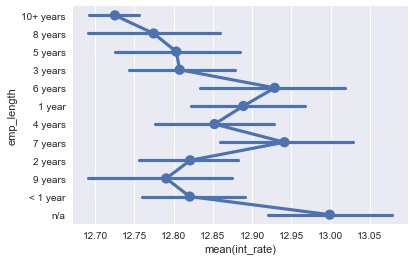

In [119]:
#emp_length vs mean int_rate
sns.pointplot(data = ldat, x = 'int_rate', y = 'emp_length')

In [118]:
#mean interest rate by emp experience
ldat.groupby('emp_length').mean()['int_rate']

emp_length
1 year       12.888848
10+ years    12.725269
2 years      12.821073
3 years      12.807632
4 years      12.852037
5 years      12.803359
6 years      12.928763
7 years      12.941088
8 years      12.774621
9 years      12.790598
< 1 year     12.820500
n/a          12.998832
Name: int_rate, dtype: float64

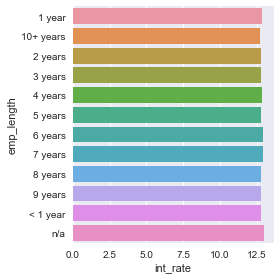

In [136]:
#Imp data slicing concept
sns.factorplot(data = ldat.groupby('emp_length').mean().reset_index(), x = 'int_rate', y = 'emp_length', kind ='bar')

In [138]:
ldat['emp_title'].value_counts().head(5)

Teacher             4079
Manager             3420
Owner               1985
RN                  1608
Registered Nurse    1571
Name: emp_title, dtype: int64

In [143]:
# Changing data type of loan amount column to float from string
ldat['loan_amnt'] = ldat['loan_amnt'].apply(lambda x: float(x))
type(ldat['loan_amnt'][0])

numpy.float64

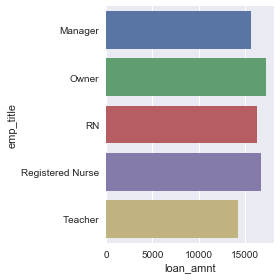

In [148]:
# Top 5 profession vs loan_amnt
# Imp concept for multi condition data-selection
tdat = ldat[(ldat['emp_title'] == 'Teacher') + (ldat['emp_title'] == 'Manager') + (ldat['emp_title'] == 'Owner') + (ldat['emp_title'] == 'RN') + (ldat['emp_title'] == 'Registered Nurse')].groupby('emp_title').mean().reset_index()
sns.factorplot(data = tdat, x = 'loan_amnt', y = 'emp_title', kind ='bar')